## Generate Simulated Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def MakeColumnNames(col):
    columnNames = []
    for i in range(col):
        columnNames.append("x"+str(i+1))
    columnNames.append("label")
    return columnNames

def SimulatedDataGenerator(col=2,k=3,nums=[50,65,52],cores=[]):
    # col: Number of columns (features) 
    # k: Number of classes
    # nums: Array, sample numbers of each class
    # cores: Array, core coordinate of each class
    dataSet = np.zeros((sum(nums),col+1))
    
    index = 0
    step = 20/k
    for i in range(k):
        try:
            core = cores[i]
        except IndexError:
            core = np.random.rand(1,3)
            core[0][0] = i*step + core[0][0]*step
            core[0][1] *= 15
            core[0][2] = i
            cores.append(core)
            
            for j in range(nums[i]):
                dot = core[0][:2] + np.random.rand(1,2)*step - step/2
                row = np.column_stack((dot,core[0][2]))
                dataSet[index] = row
                index += 1
                
    columnNames = MakeColumnNames(col)   
    dataSet = pd.DataFrame(dataSet,columns=columnNames)
    return dataSet
    

In [3]:
dataSet = SimulatedDataGenerator()

## Data Visualization

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [56]:
def visualizeDots(dataSet):
    # dataSet: pandas.DataFrame
    # k: number of classes
    colors = ['blue','green','yellow','red','oringe','pink','grey']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_title("Simulated Data")
    plt.xlabel('x')
    plt.ylabel('y')
    
    dataSet = pd.DataFrame(dataSet)
    labels = list(np.unique(dataSet.label.values))
    for lab in labels:
        lab = int(lab)
        subSet = dataSet[dataSet.label == lab]
        plt.scatter(subSet.x1,subSet.x2,label=lab,c=colors[lab],alpha=0.5,s=10)
    plt.legend()
    plt.show()   
      

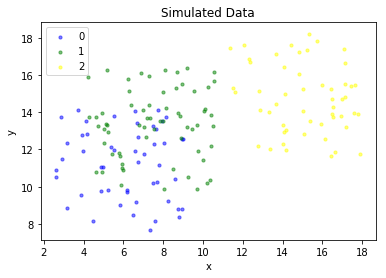

In [57]:
visualizeDots(dataSet)

## KNN Algorithm

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [67]:
def distanceCal(dot1,dot2):
    # dot1: [x1,y1], coordinate of dot1
    # dot2: [x2,y2], coordinate of dot2
    dist = np.sqrt((dot1[0]-dot2[0])**2+(dot1[1]-dot2[1])**2)
    return dist

def visualizeDots(dataSet,inputd):
    # dataSet: pandas.DataFrame
    # k: number of classes
    colors = ['blue','green','yellow','red','oringe','pink','grey']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.set_title("Simulated Data")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0,25)
    plt.ylim(0,20)
    
    dataSet = pd.DataFrame(dataSet)
    labels = list(np.unique(dataSet.label.values))
    for lab in labels:
        lab = int(lab)
        subSet = dataSet[dataSet.label == lab]
        plt.scatter(subSet.x1,subSet.x2,label=lab,c=colors[lab],alpha=0.5,s=10)
    plt.scatter(inputd[0],inputd[1],label="InputData",c='black',s=20)
    plt.legend()
    plt.show()    

def KnnClassifier(dataSet,inputd,maxd=5):
    # dataSet: pandas.DataFrame, trainning dataset
    # inputd: [x,y], input data
    # maxd: max distance, default 5
    distances = {}
    
    dataSetn = dataSet.values
    nrow = dataSetn.shape[0]
    for i in range(nrow):
        x1,x2,label = dataSetn[i]
        distance = distanceCal([x1,x2],inputd)
        if distance <= maxd:
            if not label in distances.keys():
                distances[label] = distance
            else:
                distances[label] += distance
    
    predict = max(distances, key=lambda k: distances[k])
    
    visualizeDots(dataSet,inputd)
    
    return predict


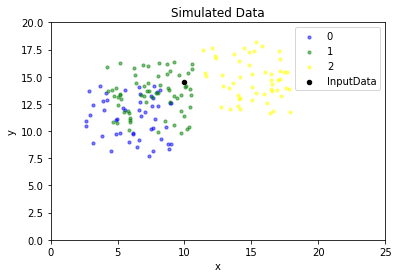

1.0

In [70]:
KnnClassifier(dataSet,[10,14.5])